In [1]:
import re

def preprocess_comment(comment):
    # Remove emojis and special characters
    comment = re.sub(r'[^\w\s]', '', comment)
    # Convert to lowercase
    comment = comment.lower()
    return comment

comment = "सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े"
preprocessed_comment = preprocess_comment(comment)
print(preprocessed_comment)

सरकर हमश स कसन क कमई क बढन क लए नईनई सकम लत रहत ह तक उन पर जयद आरथक बझ न पड


In [3]:
import os
import codecs

def get_hindi_sw():
    stopwords = set()
    here = os.path.abspath(os.path.dirname(__file__))
    # Use 'utf-8' encoding to avoid decoding issues
    with codecs.open(os.path.join(here, 'HindiComments.csv'), 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            stopwords.add(line.strip())
    return


In [7]:
pip install indic-nlp-library

  Using cached sphinx_rtd_theme-3.0.2-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached docutils-0.21.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached sphinxcontrib_jquery-4.1-py2.py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 968.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 5.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 4.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.7 MB 6.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.7 MB 5.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.7 MB 5.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.7 MB 5.0 MB/s eta 0:00:02
   ------ ----------------------

In [9]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
from unidecode import unidecode

factory = IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")

# Hindi stopwords list
hindi_stopwords = {"अ", "अत", "अपना", "अपनी", "अपने", "अभी", "आ", "इस", "इसका", "इसकी", "इसके", "इसमें", "इसे", "उन", "उनका", "उनकी", "उनके", "उनको", "उस", "उसके", "उसी", "उसे", "एक", "एस", "ऐसे", "ओर", "और", "कई", "कर", "किसी", "की", "के", "को", "गया", "जैसे", "तक", "तो", "था", "थी", "थे", "दो", "न", "नहीं", "ने", "पर", "पहले", "पूरा", "पे", "फिर", "मगर", "मे", "में", "या", "यह", "यहाँ", "यही", "रहा", "रहे", "लिए", "लिया", "लेकिन", "व", "वगेरह", "वाले", "वह", "वहाँ", "वहीं", "वाली", "सकता", "सकते", "सबसे", "से", "सो", "संग", "हि", "ही", "हुआ", "हुई", "हुए", "हो", "होता", "होती", "होते"}

nltk.download('punkt')

def preprocess_comment(comment):
    # Remove emojis
    comment = re.sub(r'[^\w\s]', '', comment)
    # Normalize text
    comment = normalizer.normalize(comment)
    # Tokenization
    tokens = indic_tokenize.trivial_tokenize(comment)
    # Remove stopwords
    tokens = [word for word in tokens if word not in hindi_stopwords]
    # Remove punctuation and digits
    tokens = [word for word in tokens if word not in string.punctuation and not word.isdigit()]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Join tokens back to text
    preprocessed_comment = ' '.join(tokens)
    return preprocessed_comment

comment = "सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े"
preprocessed_comment = preprocess_comment(comment)
print(preprocessed_comment)
print('\n')

सरकर हमश स कसन क कमई क बढन क लए नईनई सकम लत रहत ह जयद आरथक बझ पड




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
import pandas as pd

def load_stopwords(file_path):
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path, encoding='utf-8')
        
        # Assuming the stopwords are in a column named 'stopwords'
        # Adjust the column name if it's different
        stopwords = set(df['stopword'].dropna().astype(str).str.strip())
        
        return stopwords
    except Exception as e:
        print(f"Error loading stopwords: {e}")
        return set()



In [23]:
import re
import string
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
import nltk

# Initialize Indic Normalizer
factory = IndicNormalizerFactory()
normalizer = factory.get_normalizer("hi")

# Download the NLTK tokenizer models if necessary
nltk.download('punkt')

def preprocess_comment(comment, stopwords):
    # Remove emojis and special characters
    comment = re.sub(r'[^\w\s]', '', comment)
    
    # Normalize text
    comment = normalizer.normalize(comment)
    
    # Tokenization
    tokens = indic_tokenize.trivial_tokenize(comment)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    
    # Remove punctuation and digits
    tokens = [word for word in tokens if word not in string.punctuation and not word.isdigit()]
    
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    
    # Join tokens back to text
    preprocessed_comment = ' '.join(tokens)
    return preprocessed_comment

# Path to your CSV file with stopwords
#stopwords_file = 'HindiComments.csv'  # Update with the actual path if necessary
stopwords_file = 'hindi_stopwords.csv'
# Load stopwords from the CSV file
stopwords = load_stopwords(stopwords_file)

# Example comment
comment = "सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े"

# Preprocess the comment
preprocessed_comment = preprocess_comment(comment, stopwords)
print(preprocessed_comment)





सरकर हमश स कसन क कमई क बढन क लए नईनई सकम लत रहत ह तक जयद आरथक बझ न पड


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
#pip install hindi_sw 


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hindi_sw (from versions: none)
ERROR: No matching distribution found for hindi_sw


In [29]:
import pandas as pd

# Read stopwords from the CSV file
df = pd.read_csv('hindi_stopwords.csv')

# Extract stopwords into a list
hindi_stopwords = df['stopword'].tolist()

print(hindi_stopwords)


['और', 'का', 'के', 'की', 'को', 'कहाँ', 'कि', 'इस', 'है', 'हम', 'मैं', 'मेरे', 'पर', 'से', 'होगा', 'होता', 'होती', 'होने', 'इतना', 'अगर', 'अभी', 'अच्छा', 'और', 'बिना', 'भी', 'बाद', 'लेकिन', 'लिए', 'तो', 'उन', 'उस', 'उसके', 'जब', 'जैसे', 'नहीं', 'अब', 'केवल', 'सिर्फ', 'क्यों', 'हैं', 'वह', 'वे', 'यह', 'जो']


In [31]:
pip install indic-nlp-library


Note: you may need to restart the kernel to use updated packages.


In [33]:
#pip install indic-nlp-utils


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement indic-nlp-utils (from versions: none)
ERROR: No matching distribution found for indic-nlp-utils


In [35]:
import pandas as pd
import re
import string

def preprocess_text(text):
    # Remove emojis
    text = re.sub(r'[^\w\s]', '', text)
    # Remove links starting with 'https'
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # Remove English words (assuming only Hindi text is desired)
    text = re.sub(r'[a-zA-Z]+', '', text)
    # Remove numeric values
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization (simple whitespace-based)
    tokens = text.split()

    # Get Hindi stopwords from your own list
    # Example stopwords (replace with actual list)
    stopwords = ["और", "का", "के", "की", "को", "है", "हम"]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Join tokens back to text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

sentiment_mapping = {
    'defamation': 1,
    'fake': 2,
    'hate': 3,
    'non-hostile': 4,
    'offensive': 5,
}

# Load the CSV file
try:
    df = pd.read_csv("HindiComments.csv")
except FileNotFoundError:
    print("The file HindiComments.csv was not found.")
    exit()

# Apply preprocessing to the 'Post' column
df['Preprocessed_Post'] = df['Post'].apply(preprocess_text)

# Remove empty or NaN sentiments and replace them with "none"
df['Labels Set'] = df['Labels Set'].fillna("none")

# Label all comments with two sentiments together as 3
df['Label'] = df['Labels Set'].apply(lambda x: 3 if ',' in x else sentiment_mapping.get(x, 3))

# Save the preprocessed data to a new CSV file
df.to_csv("Preprocessed_HindiComments.csv", index=False)

print("Pre-processing done.")

 

 


    

Pre-processing done.


In [37]:
# Check the first few rows of the dataset
print(df.head())

# Split the dataset into features (X) and labels (y)
X = df['Preprocessed_Post']
y = df['Label']


   Unique ID                                               Post  \
0          1  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...   
1          2  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...   
2          3  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...   
3          4  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...   
4          5  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...   

             Labels Set                                  Preprocessed_Post  \
0        hate,offensive  मर दश क हनद बहत नरल ह कछ त पकक रम भकत ह कछ बबर...   
1           non-hostile  सरकर हमश स कसन क कमई क बढन क लए नईनई सकम लत रह...   
2           non-hostile  सशत न ज बजनस डल जन क क थ व डल दपश क सशत क हतय ...   
3  defamation,offensive  सल जएनय छप कमन लग हनदओ क यह कहत ह क सवधन सबक ब...   
4           non-hostile  अनलक क लए गइडलइनस जर सतबर स दशभर म मटर सव शर ह...   

   Label  
0      3  
1      4  
2      4  
3      3  
4      4  


In [39]:
# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Print the label counts
print("Label Counts:")
print(label_counts)

Label Counts:
Label
4    4358
2    1442
3    1376
5     579
1     437
Name: count, dtype: int64


In [41]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


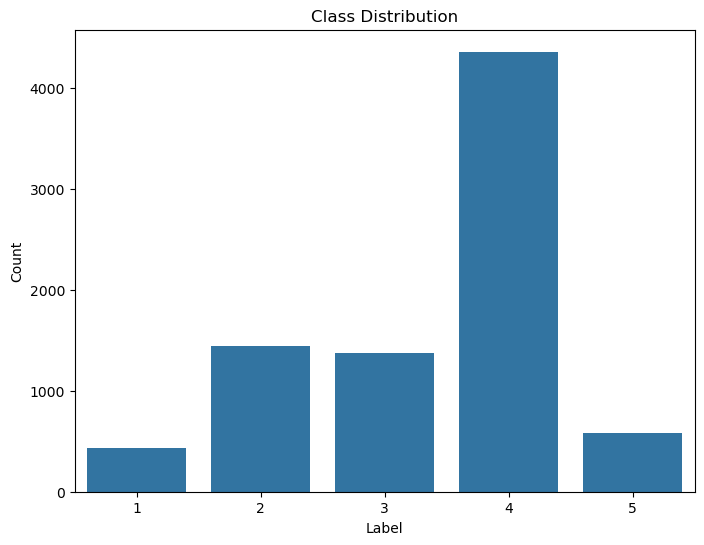

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

#Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the CSV file
data = pd.read_csv('Preprocessed_HindiComments.csv')

# Check for missing values and replace if necessary
data['Preprocessed_Post'] = data['Preprocessed_Post'].fillna("")

# Feature Extraction: TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(data['Preprocessed_Post'])
y = data['Label']

# Split data into train and test sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.80      0.04      0.08        91
           2       0.64      0.41      0.50       292
           3       0.52      0.51      0.52       284
           4       0.72      0.96      0.82       853
           5       0.41      0.09      0.15       119

    accuracy                           0.67      1639
   macro avg       0.62      0.40      0.41      1639
weighted avg       0.65      0.67      0.62      1639



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
print("Model Evaluation Results:")
for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.4f}")


Model Evaluation Results:
Logistic Regression: Accuracy = 0.6705
Multinomial Naive Bayes: Accuracy = 0.5827
Support Vector Machine: Accuracy = 0.6730
Random Forest: Accuracy = 0.6339
Gradient Boosting: Accuracy = 0.6211


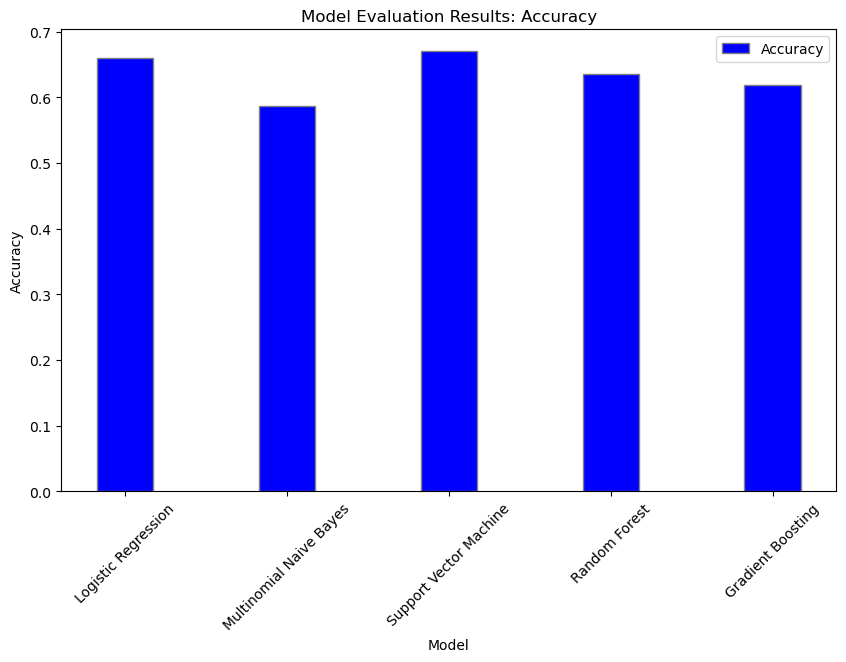

In [51]:
data = {
    'Model': ['Logistic Regression', 'Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.6602, 0.5869, 0.6699, 0.6351, 0.6181]
}

df = pd.DataFrame(data)

bar_width = 0.35

r = range(len(df))

plt.figure(figsize=(10, 6))

plt.bar(r, df['Accuracy'], color='blue', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Evaluation Results: Accuracy')
plt.xticks([r for r in range(len(df))], df['Model'], rotation=45)
plt.legend()

plt.show()

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Load the preprocessed data
df = pd.read_csv("Preprocessed_HindiComments.csv")

# Handle missing values
df['Preprocessed_Post'] = df['Preprocessed_Post'].fillna("")

# Split the data into features and labels
X = df['Preprocessed_Post']
y = df['Label']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Define the parameter grid for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search cross-validation for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_tfidf, y)

# Get best hyperparameters and best score for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters:", best_params_lr)
print("Best Score:", best_score_lr)

print("Best Score:", best_score_lr)


Best Parameters: {'C': 10, 'max_iter': 2000, 'solver': 'saga'}
Best Score: 0.7113035361357509
Best Score: 0.7113035361357509


In [55]:
pip install indic-nlp-library


Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
import nltk
nltk.download('punkt')

# Load stopwords from CSV
stopwords_df = pd.read_csv('hindi_stopwords.csv')
stopwords_set = set(stopwords_df['stopword'].tolist())  # Adjust 'stopword' if needed

# Function to preprocess text
def preprocess_text(text):
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove links starting with 'https'
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # Remove English words (assuming only Hindi text is desired)  text = re.sub(r'[a-zA-Z]+', '', text)
    # Remove numeric values
    text = re.sub(r'\d+', '', text)
    # Tokenization using NLTK
    tokens = word_tokenize(text, language='english')

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords_set]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Join tokens back to text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Define reverse mapping dictionary for labels
reverse_sentiment_mapping = {
    1: 'defamation',
    2: 'fake',
    3: 'hate',
    4: 'non-hostile',
    5: 'offensive',
    6: 'multiple'  # Label for comments with multiple sentiments
}

# Load the preprocessed data
df = pd.read_csv("Preprocessed_HindiComments.csv")

# Ensure the correct columns are present
print(df.columns)

# Handle missing values
df['Preprocessed_Post'] = df['Preprocessed_Post'].fillna("") # Split the data into features and labels
X = df['Preprocessed_Post']
y = df['Label']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Load a new comment
new_comment = input("Enter the comment: ")

# Preprocess the new comment
preprocessed_new_comment = preprocess_text(new_comment)

# Transform the preprocessed comment using the TfidfVectorizer
X_new_comment = tfidf_vectorizer.transform([preprocessed_new_comment])

# Predict the label of the new comment
predicted_label_encoded = lr_model.predict(X_new_comment)
predicted_label_name = reverse_sentiment_mapping.get(predicted_label_encoded[0], 'unknown')

print("Predicted Label:", predicted_label_name) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['Unique ID', 'Post', 'Labels Set', 'Preprocessed_Post', 'Label'], dtype='object')


Enter the comment:  उसने मेरे बारे में झूठी बातें फैलाईं, जिससे मेरी प्रतिष्ठा को नुकसान पहुँचा। मैंने कभी ऐसा कुछ नहीं कहा, लेकिन उसने मेरी छवि खराब करने के लिए जानबूझकर अफवाहें फैलाईं।


Predicted Label: non-hostile
